# Assignment 3: Convolutional Neural Networks (CNNs)


We first import all we need. These modules help us loading dataset and implementing our deep CNNs.

In [4]:
# this is used to include model diagram in this file. It is not related to the implementation
from IPython.display import Image

# torch and its modules
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Subset

# torchvision and its modules
import torchvision
import torchvision.datasets as DS
import torchvision.transforms as transforms

# for plotting
import matplotlib.pyplot as plt

# for algebric computations
import numpy as np


## Question 1: Making Dataset from CIFAR-10
To make our dataset, we first load CIFAR-10.

In [5]:
# We define the transform: this make the dataset into tensors and normalize it properly
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# let's now load CIFAR-10 train and test datasets
train_set = DS.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = DS.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### Play around with CIFAR-10
We may now take a look at the datast properties.

In [6]:
# Print size of the sets
## COMPLETE ##
print(f"train set size : {len(train_set)}")
print(f"test set size : {len(test_set)}")

# Check a data sample
print(train_set[0])
# print the label ## COMPLETE ##
print("label : ",train_set[0][1])

# print classes
print(train_set.class_to_idx)


train set size : 50000
test set size : 10000
(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
         [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
         [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
         ...,
         [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
         [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
         [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],

        [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
         [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
         [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
         ...,
         [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
         [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
         [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],

        [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],

To show an image, you may use the following function.

In [7]:
def imshow(img):
    # remove the impact of normalization
    img = img / 2 + 0.5
    npimg = img.numpy()

    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

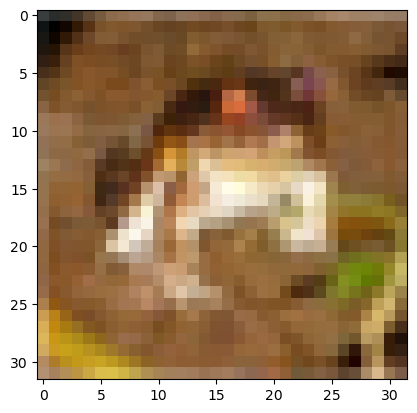

In [8]:
# use imshow() to look into a sample image
## COMPLETE ##
imshow(train_set[0][0])

### Make Training and Test Subsets
We first write the function `class_extract` that gets a dataset and a list of classes and returns a subset of dataset that include only the data-points of that class.

In [9]:
def class_extract(cls_list, dataset):
    # initial values
    indx_set = []
    label_set = {}

    # we want later to rewrite the classes
    new_labels = {cls: i for i, cls in enumerate(cls_list)}
    print(cls_list)
    # go through dataset and find points whose labels are in cls_list
    for indx, data in enumerate(dataset):
        if data[1] in cls_list:
            print("found", data[1])
            indx_set.append(indx)
            label_set[indx] = data[1] 
    # give data-points of the subset new label
    # for instance: we set now cat to class 0 and dog to class 1
    for indx in indx_set:
        dataset.targets[indx] = new_labels[label_set[indx]] 
    subset = Subset(dataset, indx_set)
    return subset

We may now try our implementation

In [10]:
cls_list = [train_set.class_to_idx['cat'], train_set.class_to_idx['dog']] 
## COMPLETE ## find it using .class_to_idx # You may give it as a dictionary
print("cat and dog labels : ",cls_list)
train_subset = class_extract(cls_list, train_set)
test_subset = class_extract(cls_list, test_set)

cat and dog labels :  [3, 5]
[3, 5]
found 3
found 3
found 3
found 3
found 5
found 3
found 3
found 3
found 3
found 5
found 5
found 5
found 3
found 5
found 3
found 3
found 3
found 5
found 5
found 3
found 3
found 5
found 5
found 3
found 3
found 5
found 3
found 5
found 5
found 3
found 5
found 3
found 5
found 3
found 5
found 5
found 5
found 5
found 3
found 5
found 3
found 3
found 5
found 5
found 3
found 5
found 3
found 3
found 3
found 3
found 5
found 3
found 5
found 5
found 3
found 5
found 5
found 3
found 3
found 5
found 3
found 3
found 3
found 5
found 5
found 3
found 5
found 3
found 3
found 5
found 3
found 5
found 3
found 3
found 3
found 5
found 5
found 5
found 3
found 3
found 5
found 5
found 5
found 3
found 3
found 5
found 3
found 5
found 5
found 3
found 5
found 5
found 5
found 3
found 3
found 5
found 5
found 3
found 3
found 3
found 5
found 3
found 5
found 3
found 3
found 3
found 5
found 5
found 5
found 3
found 5
found 3
found 3
found 5
found 3
found 5
found 3
found 3
found 5
found 5
foun

Now, let's check the size of this reduced dataset.

new len of train set : 10000
new len of test set : 2000


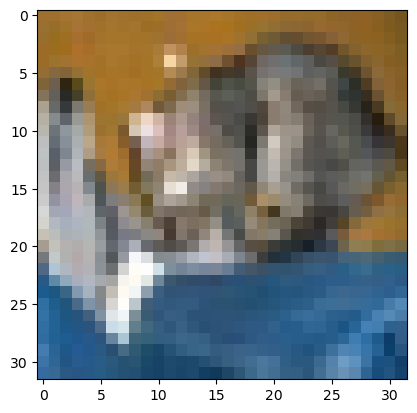

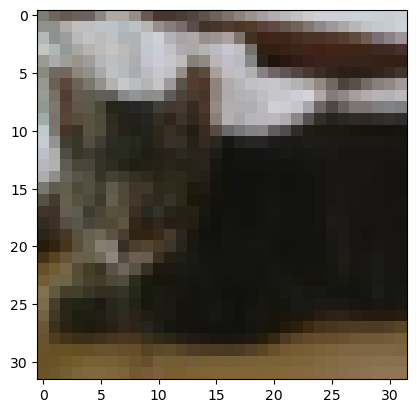

In [11]:
# print the size of test and train subsets
print(f"new len of train set : {len(train_subset)}")
print(f"new len of test set : {len(test_subset)}")

## COMPLETE ##

# you may also use imshow() to take a look at the set
imshow(test_subset[0][0])
imshow(train_subset[0][0])

### Load Training and Test Datasets as Mini-Batches
We now use the subsets to make our training and test datasets.

Use `DataLoader` to load the training and test datasets as sequences of mini-batches with batch size 100. Do not forget to set option `shuffle = True` when you use DataLoader.

In [12]:
batch_size = 100 
train_loader = DataLoader(dataset=train_subset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_subset, batch_size=batch_size)# COMPLETE ## using DataLoader()

Confirm that the number of mini-batches in iterators `train_loader` and `test_loader` matches what you expect.

In [13]:
# print the size of loaders and compare to what you expect
## COMPLETE ##
print("number of training mini batches : ", len(train_loader))
print("number of training mini batches : ", len(test_loader))

print(f"batch number of train is as expected : {len(train_loader) == int(len(train_subset)/batch_size)}")
print(f"batch number of test is as expected : {len(test_loader) == int(len(test_subset)/test_loader.batch_size)}")

number of training mini batches :  100
number of training mini batches :  20
batch number of train is as expected : True
batch number of test is as expected : True


## Question 2: Implementing Plain CNN
The diagram of the model is given below. You may first try playing with `nn.Conv2d` and `nn.MaxPool2d` to get ready for implementation.

### Implementing the Plain CNN

In [14]:
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__() 
        ## COMPLETE ## using nn.Conv2d, nn.MaxPool2d, nn.ReLU(), nn.Sigmoid() and nn.Linear
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1)
        self.ac1 = nn.ReLU()
        self.conv2 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,stride=1)
        self.ac2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.ac3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.ac4 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64*5*5,out_features=128)
        self.fca1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128,out_features=1)
        self.sig = nn.Sigmoid()

        

    def forward(self, x):
        ## COMPLETE ##
        x = self.conv1(x)
        x = self.ac1(x)
        x = self.conv2(x)
        x = self.ac2(x)
        x = self.pool1(x)
        x = self.conv3(x)
        x = self.ac3(x)
        x = self.conv4(x)
        x = self.ac4(x)
        x = self.pool2(x)
        x = x.view(-1, 64*5*5)
        x = self.fc1(x)
        x = self.fca1(x)
        x = self.fc2(x)
        x = self.sig(x)
        # Pay attention to flattening
        return x

### Implementing the Test Function

When implementing, we could use the variable `device` that specifies the device on which the computation is carried out. You may look at the following sample code.

In [15]:
# We may choose a GPU if we have one on our machine
if torch.backends.cuda.is_built():
  # if we have cuda
  # usually on Windows machines with GPU
  device = "cuda"
elif torch.backends.mps.is_built():
  # if we have MPS
  # usually on MAC
  device = "mps"
else:
  # if not we should use our CPU
  device = "cpu"

print("our device is : ",device)

our device is :  cuda


In [16]:
def test(model: myCNN, loss_function, device):
    
    # we first move our model to the configured device
    model = model.to(device = device)

    # we make sure we are not tracking gradient
    # gradient is used in training, we do not need it for test
    with torch.no_grad():
        risk = 0 
        accuracy = 0

        # here we are only evaluating the model
        ## COMPLETE ##

        # loop over test mini-batches
        for i, (images, labels) in enumerate(test_loader):
            # reshape labels to have the same form as output
            # make sure labels are of torch.float32 type
            labels = labels.reshape(-1,1)

            # move tensors to the configured device
            images = images.to(device = device)
            labels = labels.to(device = device, dtype=torch.float32)

            # forward pass
            outputs = model.forward(images)
            loss = loss_function(outputs, labels)

            # determine the class of output from sigmoid output
            predicted = (outputs >= 0.5).int()

            # compute the fraction of correctly predicted labels
            correct_predict = (predicted == labels).sum() / len(labels)

            risk += loss.item()
            accuracy += correct_predict.item()

        # average test risk and accuracy over the whole test dataset
        test_risk = risk/len(test_loader)
        test_accuracy = accuracy/len(test_loader)

    return test_risk, test_accuracy

Use the function to test the untrained CNN via the binary cross-entropy function. 

In [17]:
# Instantiate the class
test_model = myCNN()

# test it
test_risk, test_accuracy = test(test_model, loss_function=nn.BCELoss(), device=device)

print(test_risk, test_accuracy)

0.6937969297170639 0.4999999895691872


## Explanation

We could see that the test risk is a big value (0.7) and the accuracy is almost 0.5 which means that half of the times this is passing the test which is somehow logical in a sense that there is a 1/2 chance that it randomly guesses the actuall label.

### Implementing Training Loop

In [ ]:
def train(model, num_epochs, device):

    # we first move our model to the configured device
    model = model.to(device = device)

    # set loss to binary CE
    loss_function = nn.BCELoss()

    # Set optimizer with optimizer
    optimizer = torch.optim.Adam(# complete <pass the model parameters>
                          model.parameters()
                        , lr=0.001 # this specifies the learning rate
                        , weight_decay=1e-4
                        )
    ## COMPLETE ## using Adam optimizer in PyTorch + parameters in the assignment

    # Initiate the values
    train_risk = []
    test_risk = []
    test_accuracy = []


    for epoch in range(num_epochs):
        # training risk in one epoch
        risk = 0

        # tell pytorch that you start training
        ## COMPLETE ##
        model.train()
        # loop over training data
        for i, (images, labels) in enumerate(train_loader):

            # reshape labels to have the same form as output
            # make sure labels are of torch.float32 type
            labels = labels.view(-1,1)

            # move tensors to the configured device
            images = images.to(device = device)
            labels = labels.to(device = device, dtype=torch.float32)

            # forward pass
            outputs = model.forward(images)
            loss = loss_function(outputs, labels)

            # collect the training loss
            risk += loss.item()

            # backward pass
            optimizer.zero_grad()
            ## COMPLETE ##
            loss.backward()
            # one step of gradient descent
            ## COMPLETE ##
            optimizer.step()

        # first we tell pytorch we are doing evaluation (reassure it, as we have already included it in test())
        ## COMPLETE ##
        model.eval()
        # test out model after update by the optimizer
        risk_epoch, accuracy_epoch = test(model,loss_function,device)
        risk /= len(train_loader)
        # collect losses and accuracy
        train_risk.append(
                risk
            )
        test_risk.append(
                risk_epoch
            )
        test_accuracy.append(
                accuracy_epoch
            )

        # we can print a message every second epoch
        if (epoch+1) % 2 == 0:
            print(
                "train risk : " , risk, 
                "test risk : " , risk_epoch, 
                "test accuracy : ",accuracy_epoch,
                )
            

    # plot the training and test losses
    plt.plot([i+1 for i in range(num_epochs)], train_risk, label='train')
    plt.plot([i+1 for i in range(num_epochs)], test_risk, label='test')
    plt.legend()
    plt.title('Train and Test Risk')
    plt.xlabel('Epoch')
    plt.ylabel('Risk')
    plt.show()

    # plot the test accuracy
    plt.plot([i+1 for i in range(num_epochs)], test_accuracy)
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

    return train_risk, test_risk, test_accuracy

Now, we can train

train risk :  0.6695751345157623 test risk :  0.6459613293409348 test accuracy :  0.6359999895095825
train risk :  0.6321875524520874 test risk :  0.6225182950496674 test accuracy :  0.6604999840259552
train risk :  0.6094131422042847 test risk :  0.6057985216379166 test accuracy :  0.6764999866485596
train risk :  0.58881891310215 test risk :  0.5877345204353333 test accuracy :  0.6954999804496765
train risk :  0.5698213347792626 test risk :  0.5763501450419426 test accuracy :  0.6964999824762345
train risk :  0.5508902758359909 test risk :  0.5631692841649055 test accuracy :  0.7129999816417694
train risk :  0.539327761232853 test risk :  0.5472435042262077 test accuracy :  0.7149999856948852
train risk :  0.5238692632317543 test risk :  0.5386429607868195 test accuracy :  0.7134999811649323
train risk :  0.5103868719935417 test risk :  0.5257113516330719 test accuracy :  0.7319999814033509
train risk :  0.5026972070336342 test risk :  0.5212318554520607 test accuracy :  0.7394999831

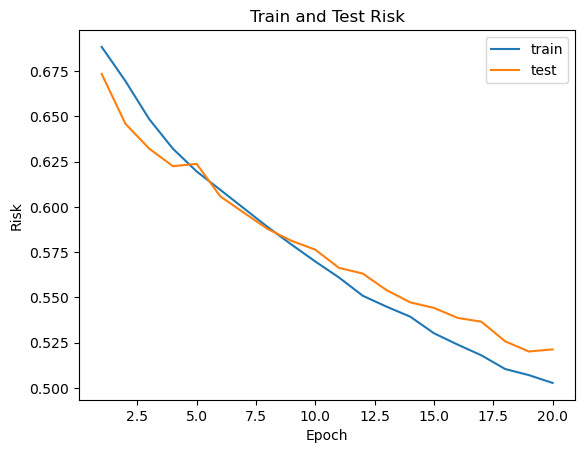

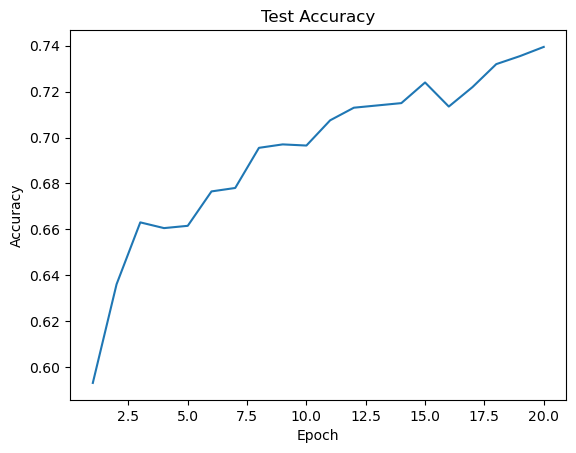

In [43]:
# Instantiate your model
model = myCNN()
num_epochs = 20 

train_risk, test_risk, test_accuracy = train(model, num_epochs=num_epochs,device=device) 

## Explanation

First we run it with 20 epochs so that we could see the divergence of train and test risks which actually show that after a certain epoch, the model started to overfit and thus the test risk would significantly go up

### Dropout and Batch Normalization
For this task you may copy class `myCNN` into this new class `myCNN_revised` and add the new blocks.

In [32]:
class myCNN_revised(nn.Module):
    def __init__(self):
        super(myCNN_revised, self).__init__() 
        ## COMPLETE ## using nn.Conv2d, nn.MaxPool2d, nn.ReLU(), nn.Sigmoid() and nn.Linear
        self.dropout1 = nn.Dropout2d(p=0.4)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1)
        self.ac1 = nn.ReLU()
        self.normalize1 = nn.BatchNorm2d(32)
        self.conv2 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,stride=1)
        self.ac2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout2d(p=0.4)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.ac3 = nn.ReLU()
        self.normalize3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.ac4 = nn.ReLU() 
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout7 = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(in_features=64*5*5,out_features=128)
        self.fca1 = nn.ReLU()
        self.normalize7 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(in_features=128,out_features=1)
        self.sig = nn.Sigmoid()

        

    def forward(self, x):
        ## COMPLETE ##
        x = self.dropout1(x)
        x = self.conv1(x)
        x = self.ac1(x)
        x = self.normalize1(x)

        x = self.conv2(x)
        x = self.ac2(x)

        x = self.pool1(x)

        x = self.dropout3(x)
        x = self.conv3(x)
        x = self.ac3(x)
        x = self.normalize3(x)

        x = self.conv4(x)
        x = self.ac4(x)

        x = self.pool2(x)

        x = x.view(-1, 64*5*5)
        x = self.dropout7(x)
        x = self.fc1(x)
        x = self.fca1(x)
        x = self.normalize7(x)

        x = self.fc2(x)
        x = self.sig(x)
        # Pay attention to flattening
        return x

Repeat the training now

train risk :  0.6897626900672913 test risk :  0.6689871996641159 test accuracy :  0.5899999916553498
train risk :  0.6669972592592239 test risk :  0.6547151893377304 test accuracy :  0.6104999899864196
train risk :  0.6559332495927811 test risk :  0.6438173234462738 test accuracy :  0.6279999911785126
train risk :  0.6483697527647019 test risk :  0.6385160177946091 test accuracy :  0.6414999932050705
train risk :  0.6427179801464081 test risk :  0.6254987090826034 test accuracy :  0.6614999890327453
train risk :  0.6366226291656494 test risk :  0.6225922763347626 test accuracy :  0.6564999848604203
train risk :  0.6254795676469803 test risk :  0.6101589441299439 test accuracy :  0.6689999848604202
train risk :  0.6197793686389923 test risk :  0.6034534603357316 test accuracy :  0.6844999849796295
train risk :  0.6095871245861053 test risk :  0.5941650539636611 test accuracy :  0.6804999887943268
train risk :  0.6045979380607605 test risk :  0.5856679320335388 test accuracy :  0.6994999

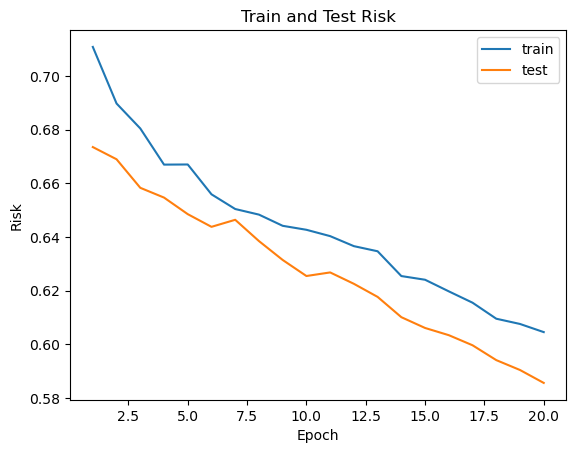

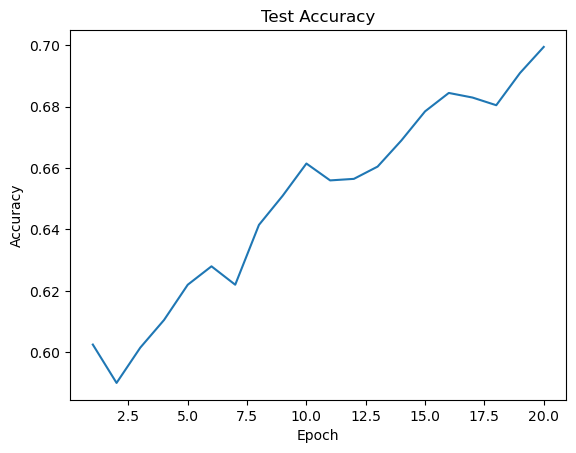

In [42]:
model = myCNN_revised()
num_epochs = 20

train_risk, test_risk, test_accuracy = train(model=model, num_epochs=num_epochs, device=device)

## Question 3: Implementing CNN with Skip Connection
The diagram of the model is given below.

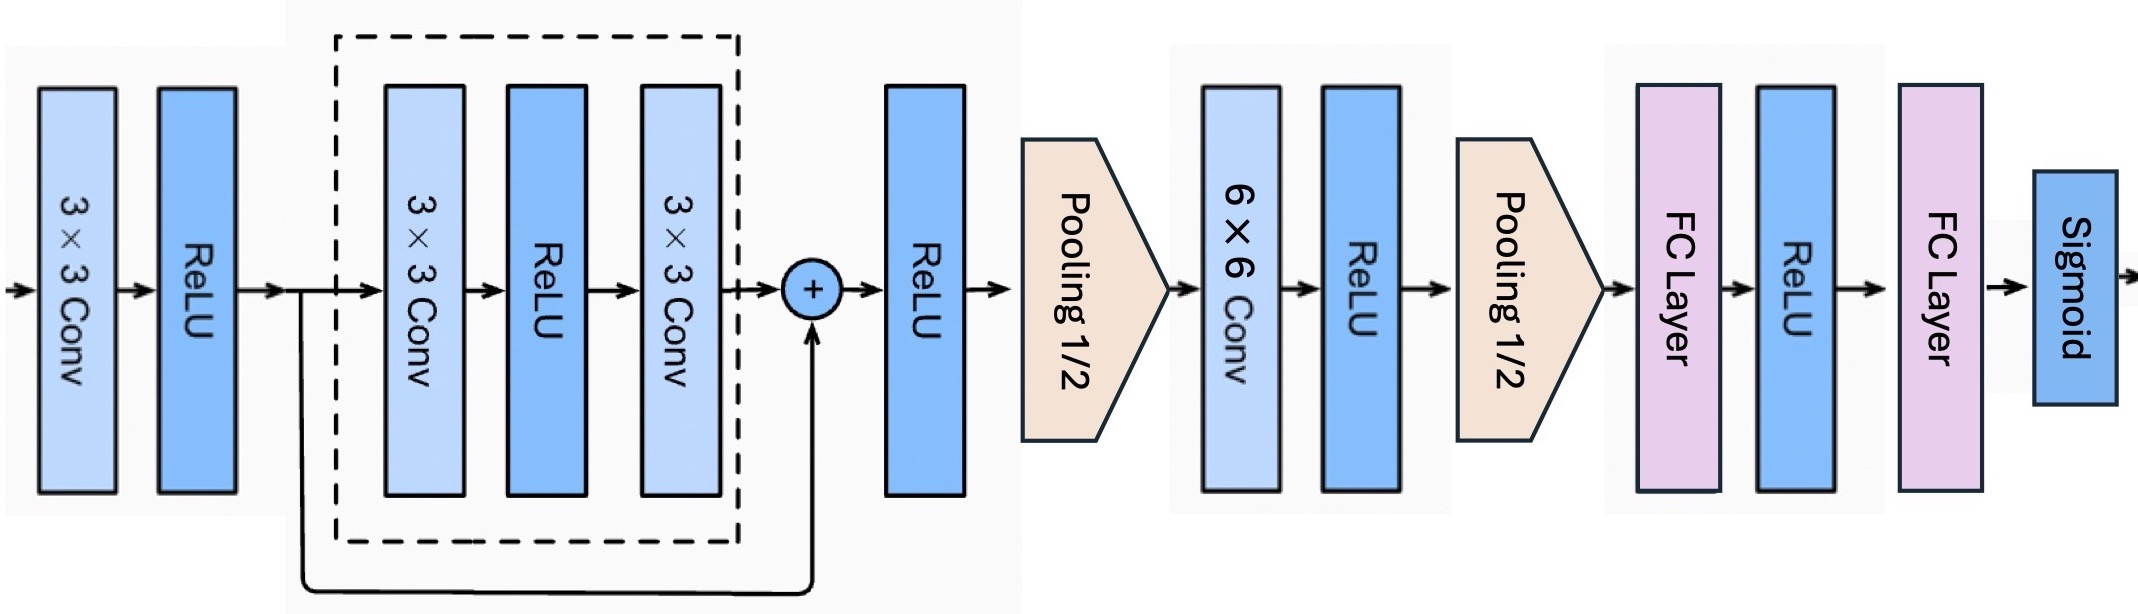

In [13]:
Image('ResNet.jpg')

### Implement the Model
Pay attention to the skip connection. The rest is the same as the plain CNN.

In [ ]:


class myResNet(nn.Module):
    def __init__(self):
        super(myResNet, self).__init__() 
        ## COMPLETE ## using nn.Conv2d, nn.MaxPool2d, nn.ReLU(), nn.Sigmoid() and nn.Linear
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1)
        self.ac1 = nn.ReLU()
        # input is 30*30
        self.conv2 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,stride=1, padding=1)
        self.ac2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        self.ac3 = nn.ReLU()
        # We have 32 * 30 * 30

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 32 * 15 * 15

        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=6, stride=1)
        self.ac4 = nn.ReLU()

        # 64 * 10 * 10
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 64 * 5 * 5
        self.fc1 = nn.Linear(in_features=64*5*5,out_features=128)
        self.fca1 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128,out_features=1)
        self.sig = nn.Sigmoid()

        

    def forward(self, x):
        ## COMPLETE ##
        x = self.conv1(x)
        fx = self.ac1(x)
        x = self.conv2(fx)
        x = self.ac2(x)
        x = self.conv3(x)
        x = self.ac3(x + fx)
        x = self.pool1(x)
        x = self.conv4(x)
        x = self.ac4(x)
        x = self.pool2(x)
        x = x.view(-1, 64*5*5)
        x = self.fc1(x)
        x = self.fca1(x)
        x = self.fc2(x)
        x = self.sig(x)
        # Pay attention to flattening
        return x

### Training our ResNet
We already have the training and test functions inplemented.

train risk :  0.6448629134893418 test risk :  0.6259456932544708 test accuracy :  0.6594999879598618
train risk :  0.6021613597869873 test risk :  0.6051476925611496 test accuracy :  0.670499986410141
train risk :  0.5657098731398582 test risk :  0.5639244571328164 test accuracy :  0.7094999790191651
train risk :  0.5333793780207634 test risk :  0.5467651411890984 test accuracy :  0.7149999767541886
train risk :  0.506425729393959 test risk :  0.5237801656126976 test accuracy :  0.7339999854564667
train risk :  0.4808672520518303 test risk :  0.5129757180809975 test accuracy :  0.7374999791383743
train risk :  0.4572752323746681 test risk :  0.5003856420516968 test accuracy :  0.7514999806880951
train risk :  0.4403147888183594 test risk :  0.4921859249472618 test accuracy :  0.7519999831914902
train risk :  0.4104079219698906 test risk :  0.49875832796096803 test accuracy :  0.7429999858140945
train risk :  0.3940982359647751 test risk :  0.5030029445886612 test accuracy :  0.75049998

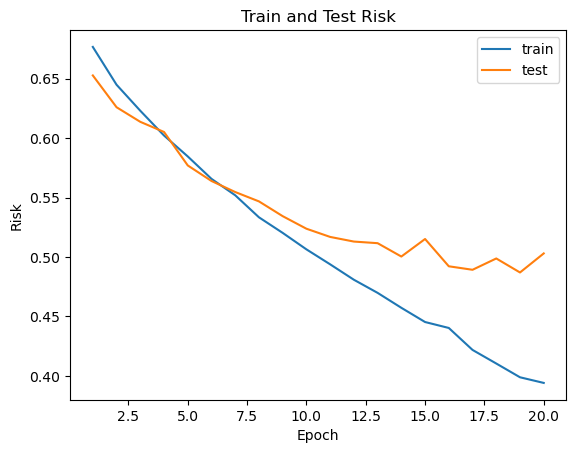

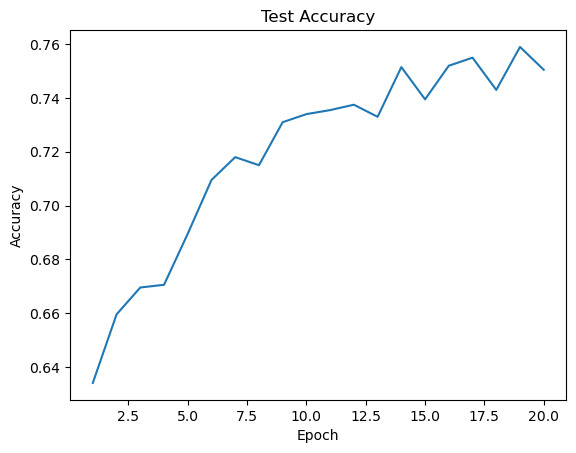

In [41]:
# Make an instant of the class
model = myResNet()
num_epochs = 20

train_risk, train_risk, test_accuracy = train(model=model, num_epochs=num_epochs, device=device)

## Explain 

As we see because of no normalization and lack of enough training data, we have overfitted our model

### Droupout and Batch Normalization
Copy class `myResNet` into the class `myResNet_revised` and apply the modifications.

In [36]:
class myResNet_revised(nn.Module):
    def __init__(self):
        super(myResNet_revised, self).__init__() 
        ## COMPLETE ## using nn.Conv2d, nn.MaxPool2d, nn.ReLU(), nn.Sigmoid() and nn.Linear
        self.dropout1 = nn.Dropout2d(p=0.4)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1)
        self.ac1 = nn.ReLU()
        self.normalize1 = nn.BatchNorm2d(32)
        # input is 30*30
        self.conv2 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,stride=1, padding=1)
        self.ac2 = nn.ReLU()
        self.normalize2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        self.ac3 = nn.ReLU()
        self.normalize3 = nn.BatchNorm2d(32)
        # We have 32 * 30 * 30

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 32 * 15 * 15
        self.dropout4 = nn.Dropout2d(p=0.4)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=6, stride=1)
        self.ac4 = nn.ReLU()
        self.normalize4 = nn.BatchNorm2d(64)

        # 64 * 10 * 10
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 64 * 5 * 5
        self.dropout7 = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(in_features=64*5*5,out_features=128)
        self.fca1 = nn.ReLU()
        self.normalize7 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(in_features=128,out_features=1)
        self.sig = nn.Sigmoid()

        

    def forward(self, x):
        ## COMPLETE ##
        x = self.dropout1(x)
        x = self.conv1(x)
        fx = self.ac1(x)
        fx = self.normalize1(fx)

        x = self.conv2(fx)
        x = self.ac2(x)
        x = self.normalize2(x)

        x = self.conv3(x)
        x = self.ac3(x + fx)
        x = self.normalize3(x)

        x = self.pool1(x)

        x = self.dropout4(x)
        x = self.conv4(x)
        x = self.ac4(x)
        x = self.normalize4(x)

        x = self.pool2(x)
        x = x.view(-1, 64*5*5)

        x = self.dropout7(x)
        x = self.fc1(x)
        x = self.fca1(x)
        x = self.normalize7(x)

        x = self.fc2(x)
        x = self.sig(x)
        # Pay attention to flattening
        return x

Now, repeat the training.

train risk :  0.6660804796218872 test risk :  0.6470267921686172 test accuracy :  0.6354999870061875
train risk :  0.6477168416976928 test risk :  0.6338697850704194 test accuracy :  0.639999982714653
train risk :  0.6354467076063156 test risk :  0.6222509056329727 test accuracy :  0.6394999921321869
train risk :  0.6244147682189941 test risk :  0.6113069266080856 test accuracy :  0.6589999794960022
train risk :  0.6119343990087509 test risk :  0.6018499910831452 test accuracy :  0.6699999839067459
train risk :  0.6010024148225784 test risk :  0.5921688973903656 test accuracy :  0.6704999804496765
train risk :  0.5940135556459427 test risk :  0.5843600839376449 test accuracy :  0.6799999803304673
train risk :  0.5826285493373871 test risk :  0.5720990061759949 test accuracy :  0.6909999787807465
train risk :  0.5695259183645248 test risk :  0.5663262188434601 test accuracy :  0.6909999817609787
train risk :  0.5600403335690498 test risk :  0.5547768726944924 test accuracy :  0.69849998

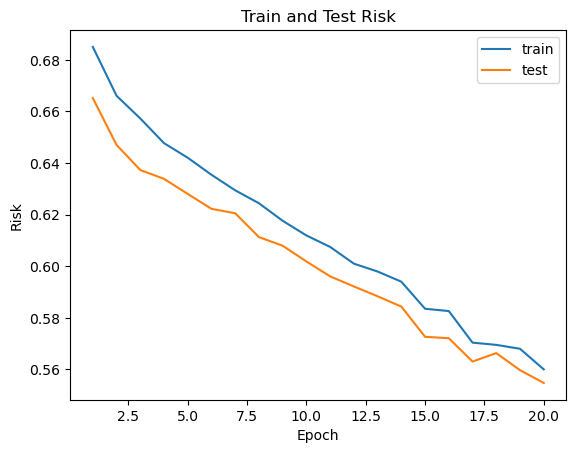

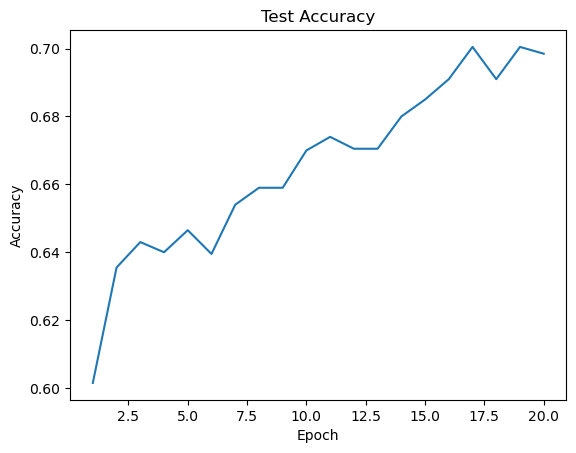

In [40]:
# Make an instant
model = myResNet_revised()
num_epochs = 20

train_risk, train_risk, test_accuracy = train(model=model, num_epochs=num_epochs, device=device) 

### ResNet with Only Batch Normalization
You may simply remove the dropouts, and try again training

In [38]:

class myResNet_onlyBN(nn.Module):
    def __init__(self):
        super(myResNet_onlyBN, self).__init__() 
        ## COMPLETE ## using nn.Conv2d, nn.MaxPool2d, nn.ReLU(), nn.Sigmoid() and nn.Linear
        self.dropout1 = nn.Dropout2d(p=0.4)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1)
        self.ac1 = nn.ReLU()
        self.normalize1 = nn.BatchNorm2d(32)
        # input is 30*30
        self.conv2 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3,stride=1, padding=1)
        self.ac2 = nn.ReLU()
        self.normalize2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        self.ac3 = nn.ReLU()
        self.normalize3 = nn.BatchNorm2d(32)
        # We have 32 * 30 * 30

        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 32 * 15 * 15
        self.dropout4 = nn.Dropout2d(p=0.4)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=6, stride=1)
        self.ac4 = nn.ReLU()
        self.normalize4 = nn.BatchNorm2d(64)

        # 64 * 10 * 10
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # 64 * 5 * 5
        self.dropout7 = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(in_features=64*5*5,out_features=128)
        self.fca1 = nn.ReLU()
        self.normalize7 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(in_features=128,out_features=1)
        self.sig = nn.Sigmoid()

        

    def forward(self, x):
        ## COMPLETE ##

        x = self.conv1(x)
        fx = self.ac1(x)
        fx = self.normalize1(fx)

        x = self.conv2(fx)
        x = self.ac2(x)
        x = self.normalize2(x)

        x = self.conv3(x)
        x = self.ac3(x + fx)
        x = self.normalize3(x)

        x = self.pool1(x)


        x = self.conv4(x)
        x = self.ac4(x)
        x = self.normalize4(x)

        x = self.pool2(x)
        x = x.view(-1, 64*5*5)

        x = self.fc1(x)
        x = self.fca1(x)
        x = self.normalize7(x)

        x = self.fc2(x)
        x = self.sig(x)
        # Pay attention to flattening
        return x

Now repeat training

train risk :  0.535588256418705 test risk :  0.5595302969217301 test accuracy :  0.707499983906746
train risk :  0.40242656707763674 test risk :  0.5222097337245941 test accuracy :  0.7459999769926071
train risk :  0.2873161533474922 test risk :  0.5290147185325622 test accuracy :  0.7444999814033508
train risk :  0.1800541637837887 test risk :  0.5549394950270653 test accuracy :  0.7449999779462815
train risk :  0.10684451542794704 test risk :  0.5976703435182571 test accuracy :  0.7454999774694443
train risk :  0.05874610397964716 test risk :  0.6370519757270813 test accuracy :  0.7464999854564667
train risk :  0.03531729534268379 test risk :  0.6996616303920746 test accuracy :  0.7454999834299088
train risk :  0.02288742764852941 test risk :  0.732565388083458 test accuracy :  0.7449999839067459
train risk :  0.01337229368276894 test risk :  0.7608415216207505 test accuracy :  0.7429999798536301
train risk :  0.010147032388485968 test risk :  0.8104222506284714 test accuracy :  0.73

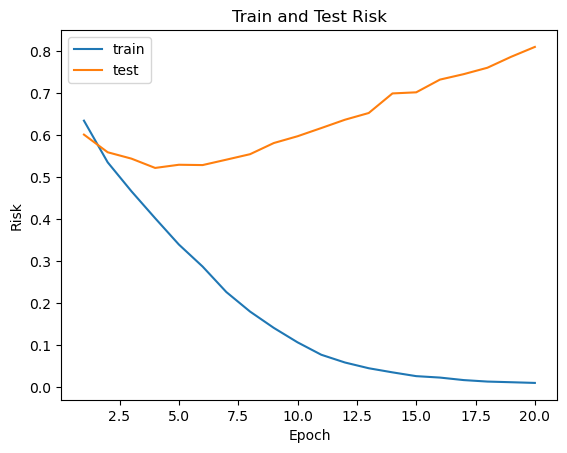

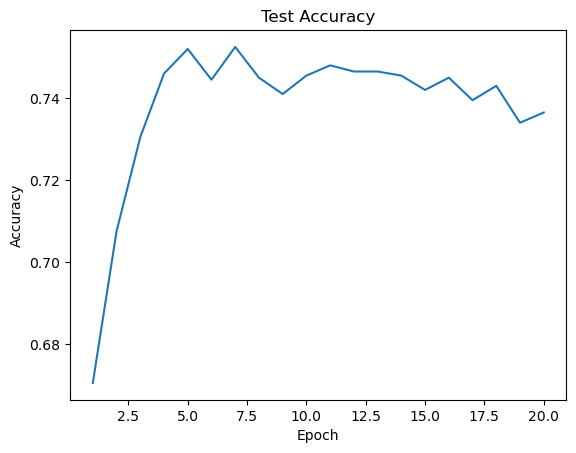

In [39]:
# Make an instant
model = myResNet_onlyBN()
num_epochs = 20

train_risk, train_risk, test_accuracy =  train(model=model, num_epochs=num_epochs, device=device)

## Explain

As seen the model would overfit and the test risk would diverge very quickly.